# Encoding Categorical Variables

The categories of a categorical variable are usually not numeric. For example, eye color can be "black", "blue", "brow", etc. Thus, an encoding method is needed to turn these nonnumeric categories into numbers.

## Dummy

In [29]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [30]:
iris = datasets.load_iris()

In [31]:
df = pd.DataFrame( iris.data, columns=iris.feature_names )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
cols = df.columns.to_list()
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
df['species'] = pd.Categorical.from_codes( iris.target, iris.target_names )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


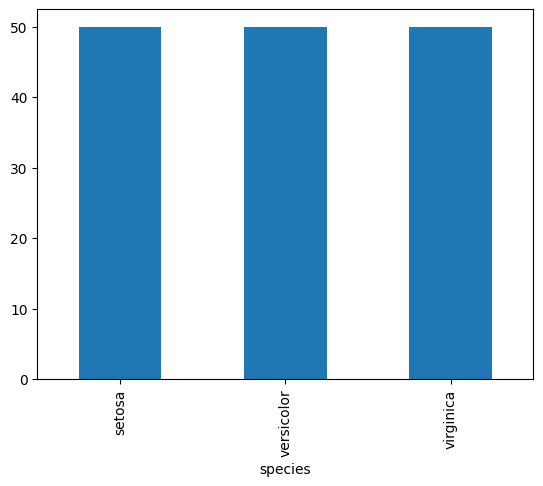

In [34]:
df['species'].value_counts().plot(kind='bar')
plt.show()

_______

In [53]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define a toy dataset od apartment rental proces in
# New York, San Francisco, and Seatle
df = pd.DataFrame({
    'City' : ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
    'Rent' : [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2502]
})

In [54]:
df['Rent'].mean()

np.float64(3333.4444444444443)

In [55]:
# Convert the categorical variables in the DataFrame to one-hot encoding
# and fit a linear regression model
one_hot_df = pd.get_dummies(df, prefix=['city'])
one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,False,True,False
1,4000,False,True,False
2,4001,False,True,False
3,3499,True,False,False
4,3500,True,False,False
5,3501,True,False,False
6,2499,False,False,True
7,2500,False,False,True
8,2502,False,False,True


In [57]:
model = LinearRegression()
model

LinearRegression()

In [61]:
model.fit(
    one_hot_df[one_hot_df.filter(like='city_').columns.to_list()],
    one_hot_df['Rent']
)

LinearRegression()

In [62]:
model.coef_

array([ 166.55555556,  666.55555556, -833.11111111])

In [63]:
model.intercept_

np.float64(3333.4444444444443)

In [64]:
# Train a linear regression model on dummy code
# Specify the 'drop_first' flag to get dummy coding
df_dummy = pd.get_dummies(
    df,
    prefix='city',
    drop_first=True
)
df_dummy

,Rent,city_SF,city_Seattle
0,3999,True,False
1,4000,True,False
2,4001,True,False
3,3499,False,False
4,3500,False,False
5,3501,False,False
6,2499,False,True
7,2500,False,True
8,2502,False,True


In [65]:
model.fit(
    df_dummy[df_dummy.filter(like='city').columns.to_list()],
    df_dummy['Rent']
)

LinearRegression()

In [66]:
model.coef_

array([ 500.        , -999.66666667])

In [67]:
model.intercept_

np.float64(3499.9999999999995)

## pandas get_dummies

In [35]:
df_dummy = pd.get_dummies(
    df, # DataFrame
    columns=['species']
)
df_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [36]:
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

__Recordar quitar siempre una columna de las dummies__

In [37]:
df_dummy[ [ c for c in df_dummy if c not in cols ] ] = df_dummy[ [ c for c in df_dummy if c not in cols ] ].astype(int)
df_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## OneHotEncoder

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
# intance object OneHotEncoder
encoder = OneHotEncoder( sparse_output=False )
encoder

OneHotEncoder(sparse_output=False)

In [41]:
# Tranform or encode categorical variable
species_encoded = encoder.fit_transform( df[['species']] )
species_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [42]:
# Generate names
feature_names = encoder.categories_[0].tolist()
feature_names = [ f"type_{name}" for name in feature_names ]
feature_names

['type_setosa', 'type_versicolor', 'type_virginica']

In [43]:
species_encoded_df = pd.DataFrame(
    species_encoded,
    columns=feature_names
)
species_encoded_df

,type_setosa,type_versicolor,type_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [44]:
df_final = pd.concat( [df, species_encoded_df], axis=1)
df_final.drop( columns=['species'], inplace=True )
df_final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_setosa,type_versicolor,type_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [48]:
df['Rent'].mean()

np.float64(3333.4444444444443)

,Rent,city_NYC,city_SF,city_Seattle
0,3999,False,True,False
1,4000,False,True,False
2,4001,False,True,False
3,3499,True,False,False
4,3500,True,False,False
5,3501,True,False,False
6,2499,False,False,True
7,2500,False,False,True
8,2502,False,False,True
